In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA

In [2]:
df = pd.read_csv(r'C:\Users\USER\OneDrive\שולחן העבודה\fashion-mnist_train.csv')

In [3]:
df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
df.shape

(60000, 785)

#### Let's count the unique numbers of labels in the training set :

In [5]:
len(df['label'].unique())

10

### Description of labels:

| Label | Description | 
| :- | :- | 
| 0	| T-shirt/top |
| 1 |	Trouser |
| 2	| Pullover |
| 3	| Dress |
| 4	| Coat |
| 5	| Sandal |
| 6	| Shirt |
| 7	| Sneaker |
| 8	| Bag |
| 9	| Ankle boot | 

#### Let's count how many images each label have: 

In [8]:
df['label'].value_counts()

9    6000
8    6000
7    6000
6    6000
5    6000
4    6000
3    6000
2    6000
1    6000
0    6000
Name: label, dtype: int64

As we can tell now, there are 10 labels and each one of them includes 6000 images, so we get 10*6000=60000 images.

In [9]:
data = df.iloc[:,1:] / 255
print('Shape of the input data',data.shape)

Shape of the input data (60000, 784)


In [10]:
data.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.019608,0.0,0.0,...,0.000000,0.0,0.0,0.117647,0.168627,0.000000,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.003922,0.007843,0.0,0.0,0.000000,0.0,0.0,...,0.011765,0.0,0.0,0.000000,0.000000,0.003922,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0


In [11]:
target = df[['label']].iloc[:, :]
print('Shape of the input label', target.shape)

Shape of the input label (60000, 1)


In [12]:
target.head()

,label
0,2
1,9
2,6
3,0
4,3


We save the meaningful as **label** for later visualization purposes

In [13]:
label = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

Let's visualize the first 20 images:

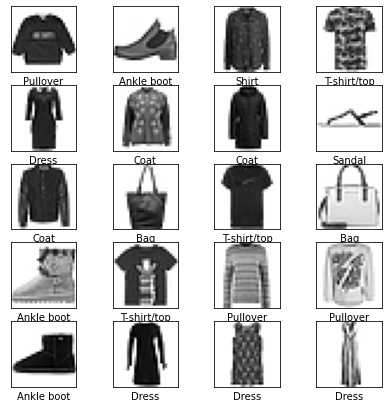

In [14]:
plt.figure(figsize=(7,7))
for i in range(20):
    plt.subplot(5,4, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(np.array(data.iloc[i, :]).reshape(28,28), cmap=plt.cm.binary)
    plt.xlabel(label[target.label.iloc[i]])

In [27]:
from sklearn.ensemble import RandomForestClassifier,VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [28]:
from sklearn.linear_model import LogisticRegression
random_state=42
classifier = [DecisionTreeClassifier(random_state=random_state),
             RandomForestClassifier(random_state=random_state),
             LogisticRegression(random_state=random_state,solver='lbfgs',max_iter=100000),
             KNeighborsClassifier()]
dt_param_grid={"min_samples_split":range(10,500,20),
              "max_depth":range(1,20,2)}
rf_param_grid={"max_features":[1,3,10],
              "min_samples_split":[2,3,10],
              "min_samples_leaf":[1,3,10],
              "bootstrap":[False],
              "n_estimators":[100,300],
              "criterion":["gini"]}

logreg_param_grid={"C":np.logspace(-3,3,7),
                  "penalty":["l1","l2"]}
knn_param_grid={"n_neighbors": np.linspace(1,19,10,dtype=int).tolist(),
               "weights":["uniform","distance"],
               "metric":["euclidean","manhattan"]}
classifier_param=[dt_param_grid,
                 rf_param_grid,
                 logreg_param_grid,
                 knn_param_grid]

In [31]:
data,X_test,target,y_test=train_test_split(data,target,test_size=0.33,random_state=42)

In [32]:
cv_result=[]
best_estimators=[]
for i in range(len(classifier)):
    clf=GridSearchCV(classifier[i],param_grid=classifier_param[i],cv=5,scoring="accuracy",n_jobs=-1,verbose=1)
    clf.fit(data,target)
    cv_result.append(clf.best_score_)
    best_estimators.append(clf.best_estimator_)
    print(cv_result[i])

Fitting 5 folds for each of 250 candidates, totalling 1250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   21.5s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  9.6min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed: 67.5min
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed: 88.8min
[Parallel(n_jobs=-1)]: Done 1250 out of 1250 | elapsed: 89.5min finished


0.8055472636815921
Fitting 5 folds for each of 54 candidates, totalling 270 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  9.5min
[Parallel(n_jobs=-1)]: Done 270 out of 270 | elapsed: 24.4min finished
C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:765: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


0.8825124378109452
Fitting 5 folds for each of 14 candidates, totalling 70 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  5.9min
[Parallel(n_jobs=-1)]: Done  70 out of  70 | elapsed: 120.1min finished
C:\Users\USER\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


0.8548009950248756
Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed: 117.3min
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed: 395.7min
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed: 793.7min finished
C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:765: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


0.8554228855721393


In [34]:
votingC = VotingClassifier(estimators = [("dt",best_estimators[0]),
                                        ("rfc",best_estimators[1])],
                                        voting = "soft", n_jobs = -1)
votingC = votingC.fit(data, target)
print(accuracy_score(votingC.predict(X_test),y_test))

C:\Users\USER\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


0.8323232323232324


**Great!** <br>
As we can tell we got the best accuracy using random forest classifier, 0.88 !

Now let's try reducing features using PCA and hope for better results.

First we split the target label from the rest of the labels like we did before:

In [43]:
data = df.iloc[:,1:] / 255
print('Shape of the input data',data.shape)

Shape of the input data (60000, 784)


In [44]:
target = df[['label']].iloc[:, :]
print('Shape of the input label', target.shape)

Shape of the input label (60000, 1)


Now we apply PCA to the 'data', i.e. fit transform 'data' and transform  

In [45]:
data,X_test,target,y_test=train_test_split(data,target,test_size=0.33,random_state=42)

In [63]:
pca =PCA()
pca.fit(data)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95)+1
pca=PCA(n_components = 0.95)
data = pca.fit_transform(data)
X_test = pca.transform(X_test)

In [65]:
rf =  RandomForestClassifier(random_state=random_state)
rf.fit(data, target)
rf_pred = rf.predict(X_test)
print(accuracy_score(y_test, rf_pred))

<ipython-input-65-1cc1e39d5df9>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(data, target)


0.8612626262626263


After we applied dimensionality reduction to the train set, we evaluated the model, using Random Forest classifier, we got a good accuracy 0.86.

But the best accuracy we got was without applying PCA, which was 0.88.